#**Step 01: Installing the Packages**

In [1]:
%%capture
!pip install super-gradients==3.4.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

#**Step 02: Importing all the required libraries**

In [2]:
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

The console stream is logged into C:\Users\parve\sg_logs\console.log


[2024-08-27 01:13:37] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-08-27 01:13:38] WARNING - __init__.py - Failed to import pytorch_quantization
W0827 01:13:38.230000 2740 torch\distributed\elastic\multiprocessing\redirects.py:28] NOTE: Redirects are currently not supported in Windows or MacOs.
[2024-08-27 01:13:41] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-08-27 01:13:41] WARNING - export.py - Failed to import pytorch_quantization
[2024-08-27 01:13:41] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-08-27 01:13:41] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [3]:
from IPython.display import clear_output


In [4]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback



In [5]:
from super_gradients.training import models


#**Step 03: Setting up the checkpoint directory**

In [6]:
CHECKPOINT_DIR = 'checkpoints2'
trainer = Trainer(experiment_name='sign_yolonas_run2', ckpt_root_dir=CHECKPOINT_DIR)

**Step 04: Exporting the Dataset**

In [6]:
!pip install roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="HWwcfmFbbQB36tkiDnvO")
project = rf.workspace("indian-sign-language-detection").project("isl-yolov5")
version = project.version(5)
dataset = version.download("yolov5")


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\parve\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to ISL-YOLOv5-5 in yolov5pytorch::   0%|          | 0/13362 [00:00<?, ?it/s]

Extracting Dataset Version Zip to ISL-YOLOv5-5 in yolov5pytorch:: 100%|██████████| 13362/13362 [00:19<00:00, 702.45it/s]


#**Step 05: Load dataset parameters into a dictionary**

In [7]:
dataset_params = {
    'data_dir':'ISL-YOLOv5-5',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': [
  '1', '2', '3', '4', '5', '6', '7', '8', '9',
  'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H',
  'Hello', 'I', 'IloveYou', 'J', 'K', 'L',
  'M', 'N', 'No', 'O', 'P', 'Please', 'Q',
  'R', 'S', 'T', 'Thanks', 'U', 'V', 'W',
  'X', 'Y', 'Yes', 'Z', 'undefined'
]}



#**Step 06: Pass the values for `dataset_params` into the `dataset_params` argument.**

In [8]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

clear_output()

Indexing dataset annotations: 100%|██████████| 307/307 [00:00<00:00, 2558.37it/s]


#**Step 07: Inspect the Dataset Defined**

In [9]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

In [10]:
train_data.dataset.dataset_params['transforms'][1]

{'DetectionRandomAffine': {'degrees': 10.0, 'translate': 0.1, 'scales': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'filter_box_candidates': True, 'wh_thr': 2, 'area_thr': 0.1, 'ar_thr': 20}}

In [11]:
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42

#**Step 08: Plot a batch of training data with their augmentations**

C:\Users\parve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\arraypad.py:487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)


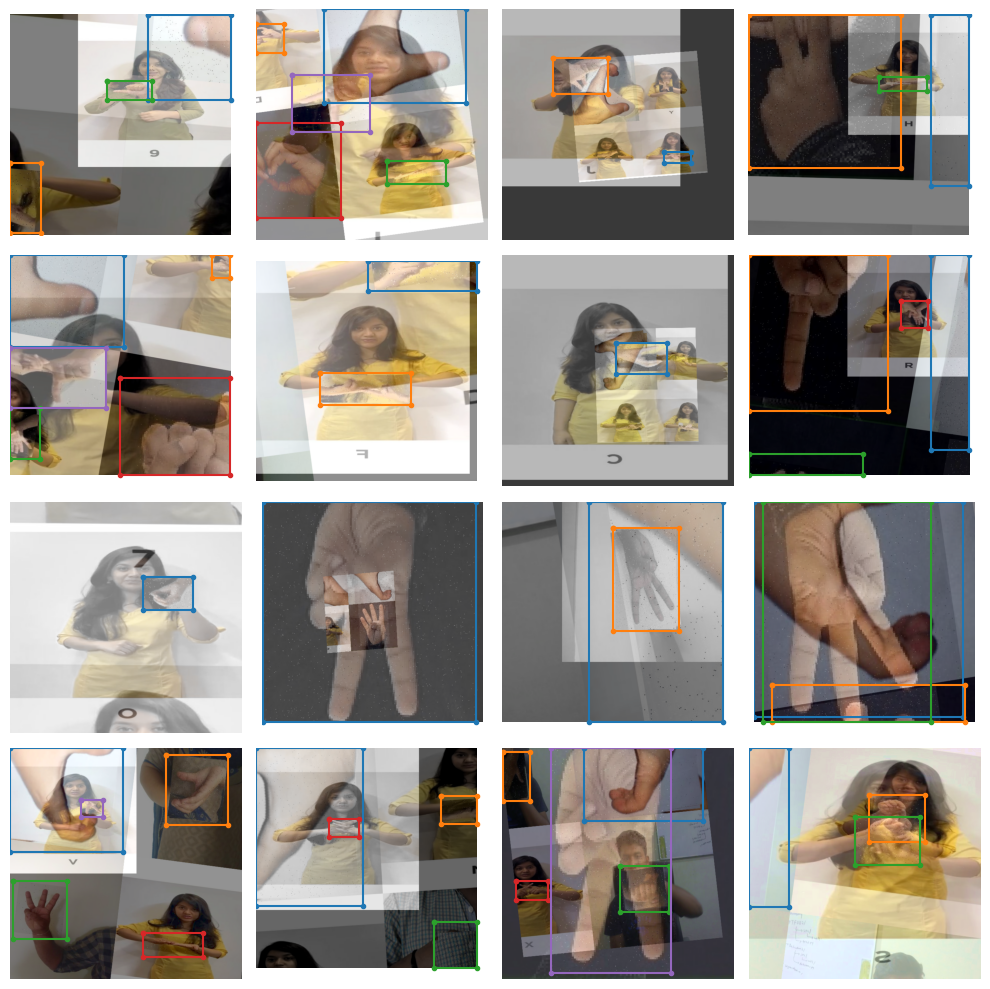

In [12]:
train_data.dataset.plot()

#**Step 09: Instantiating the model**

In [13]:
model = models.get('yolo_nas_s', 
                   num_classes=len(dataset_params['classes']), 
                   pretrained_weights="coco"
                   )

[2024-08-27 01:14:20] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-08-27 01:14:20] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


#**Step 10:  Define metrics and training parameters**


In [14]:
train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 50,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

#**Step 12: Training the model**



In [26]:
trainer.train(model=model, 
              training_params=train_params, 
              train_loader=train_data, 
              valid_loader=val_data)


[2024-08-26 15:34:06] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240826_153406_066784`
[2024-08-26 15:34:06] INFO - sg_trainer.py - Checkpoints directory: checkpoints2\sign_yolonas_run2\RUN_20240826_153406_066784


The console stream is now moved to checkpoints2\sign_yolonas_run2\RUN_20240826_153406_066784/console_Aug26_15_34_06.txt


[2024-08-26 15:34:07] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
C:\Users\parve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\super_gradients\common\registry\registry.py:72: DeprecationWarning: Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
  warnings.warn(f"Object name `{name}` is now deprecated. Please replace it with `{deprecated_names[name]}`.", DeprecationWarning)
C:\Users\parve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\super_gradients\training\sg_trainer\sg_trainer.py:1635: UserWarning: Mixed precision training is not supported on CPU. Disabling mixed precision. (i.e. `mixed_precision=False`)
  warnings.warn("Mixed precision training is not supported on CPU. Disabling mixed precision. (i.e. `mixed_precision=False`)")
C:\Users\parv

[2024-08-27 00:27:41] INFO - sg_trainer.py - 
[MODEL TRAINING EXECUTION HAS BEEN INTERRUPTED]... Please wait until SOFT-TERMINATION process finishes and saves all of the Model Checkpoints and log files before terminating...
[2024-08-27 00:27:41] INFO - sg_trainer.py - For HARD Termination - Stop the process again
[2024-08-27 00:27:41] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process


#**Step 13: trained model**

In [15]:
best_model = models.get('yolo_nas_s',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="checkpoints2\sign_yolonas_run2\RUN_20240826_153406_066784\ckpt_best.pth")

C:\Users\parve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\super_gradients\training\utils\checkpoint_utils.py:185: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an iss

#**Step 14: Evaluating the best trained model on the test set**

In [25]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1, 
                                                   top_k_predictions=300, 
                                                   num_cls=len(dataset_params['classes']), 
                                                   normalize_targets=True, 
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01, 
                                                                                                          nms_top_k=1000, 
                                                                                                          max_predictions=300,                                                                              
                                                                                                          nms_threshold=0.7)
                                                  ))

Testing: 100%|██████████| 20/20 [04:19<00:00,  9.07s/it]

{'Precision@0.50': 0.012286113575100899,
 'Recall@0.50': 0.6494360566139221,
 'mAP@0.50': 0.10047338902950287,
 'F1@0.50': 0.023794865235686302}

Testing: 100%|██████████| 20/20 [04:20<00:00, 13.01s/it]


#**Step 15:  Predicting with the best model**



[2024-08-27 01:32:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


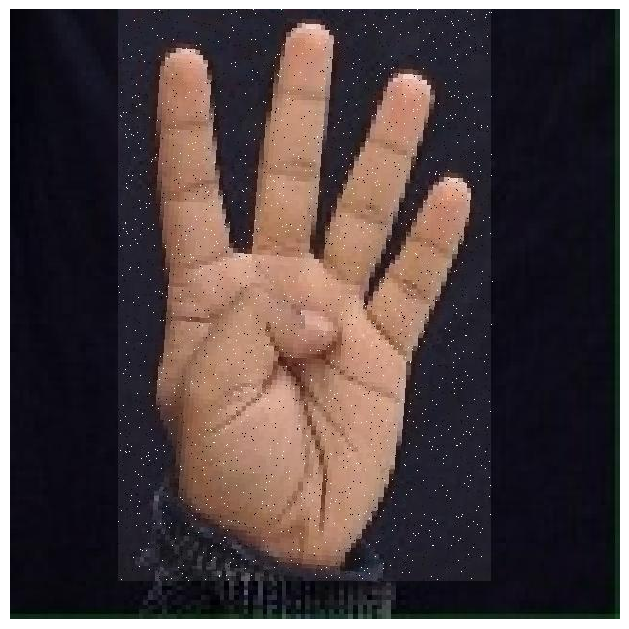

In [27]:
img_url = 'Tesimg.jpg'
best_model.predict(img_url).show()

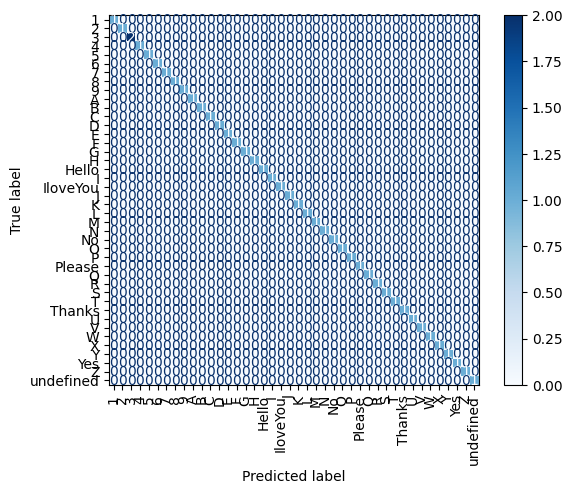

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Example: Replace these with your actual values
classes = [
  '1', '2', '3', '4', '5', '6', '7', '8', '9',
  'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H',
  'Hello', 'I', 'IloveYou', 'J', 'K', 'L',
  'M', 'N', 'No', 'O', 'P', 'Please', 'Q',
  'R', 'S', 'T', 'Thanks', 'U', 'V', 'W',
  'X', 'Y', 'Yes', 'Z', 'undefined'
]
y_true = np.array([0, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43])  # Replace with actual labels
y_pred = np.array([0, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43])  # Replace with actual predictions

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(len(classes)))

# Display the confusion matrix with the class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

# Show the plot
plt.show()


In [ ]:
img_url = f'Tesimg.jpg'
best_model.predict(img_url).show()